In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gojo = cv2.imread('satoru.jpg')
gojo = cv2.cvtColor(gojo,cv2.COLOR_BGR2GRAY)

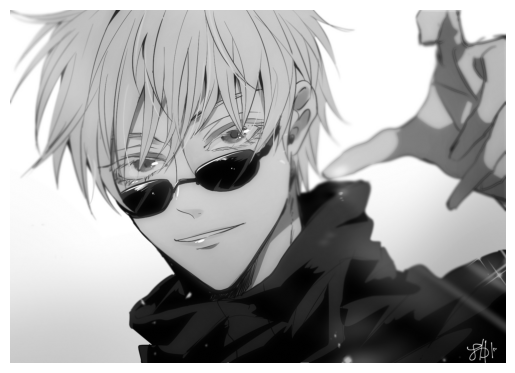

In [3]:
plt.imshow(gojo,cmap = 'grey')
plt.axis('off')
plt.show()

<h1>Canny edge detection</h1>

<h3>STEP1:Noise reduction</h3>

In [4]:
blurred_gojo = cv2.GaussianBlur(gojo,(3,3),1)

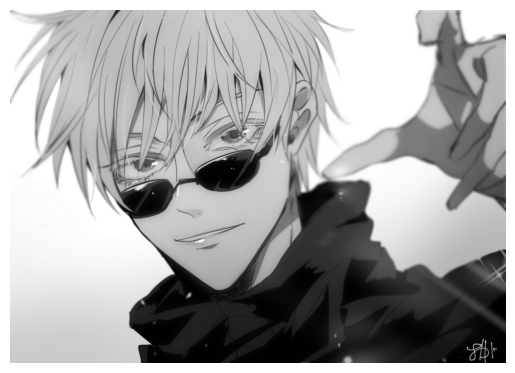

In [5]:
plt.imshow(blurred_gojo,cmap = 'grey')
plt.axis('off')
plt.show()

<h3>STEP2:Gradient calculation</h3>

In [12]:
def sobel_filter(img):
    kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gx = np.zeros_like(img, dtype=np.int64)
    gy = np.zeros_like(img, dtype=np.int64)
    padded_img = cv2.copyMakeBorder(img,1,1,1,1, cv2.BORDER_REFLECT)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            win = padded_img[i:i+3, j:j+3]
            gx[i, j] = np.sum(win * kernelx)
            gy[i, j] = np.sum(win * kernely)
    result_img = np.hypot(gx, gy)
    result_img = np.clip(result_img, 0, 255)
    return result_img.astype(np.uint8),gx,gy

magnitude,gx,gy = sobel_filter(blurred_gojo)

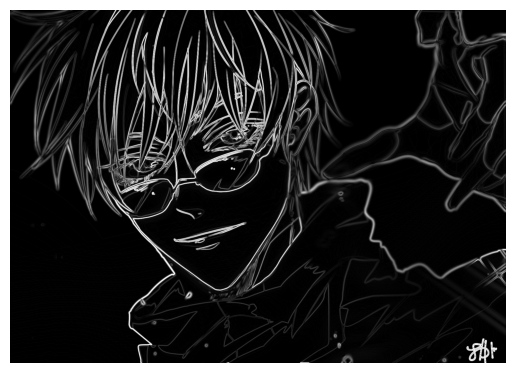

In [14]:
plt.imshow(magnitude,cmap = 'grey')
plt.axis('off')
plt.show()

<h3>STEP3:Non-maximum suppression</h3>

In [15]:
direction = np.arctan2(gy, gx)
nms_image = np.zeros_like(magnitude)
angle = direction * 180. / np.pi
angle[angle < 0] += 180
    
for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        try:
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]
            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                nms_image[i, j] = magnitude[i, j]
            else:
                nms_image[i, j] = 0
        except IndexError as e:
            pass

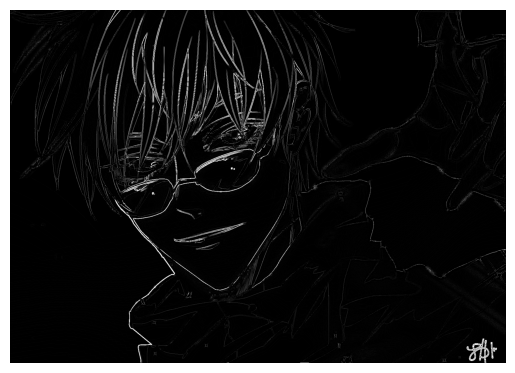

In [16]:
plt.imshow(nms_image,cmap = 'grey')
plt.axis('off')
plt.show()

<h3>Double thresholding</h3>

In [17]:
strong_edges = (nms_image > 100)
weak_edges = ((nms_image >= 50) & (nms_image <= 100 ))
result = np.zeros_like(gojo)

In [18]:
strong_i, strong_j = np.where(strong_edges)
zeros_i, zeros_j = np.where(nms_image == 0)
    
result[strong_i, strong_j] = 255
result[zeros_i, zeros_j] = 0

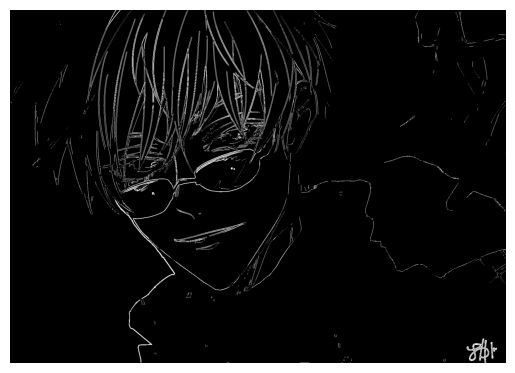

In [19]:
plt.imshow(result,cmap = 'grey')
plt.axis('off')
plt.show()

<h1>LoG(Laplacian of gaussian ) and doG(difference of gaussians)</h1>

<h3>LoG</h3>

In [20]:
from scipy.ndimage import convolve

def loG(image, sigma):
    smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)
    lkernel = np.array([[0, 1, 0],
                        [1, -4, 1],
                        [0, 1, 0]])
    result = convolve(smoothed_image, lkernel)
    return result.astype(np.uint8)



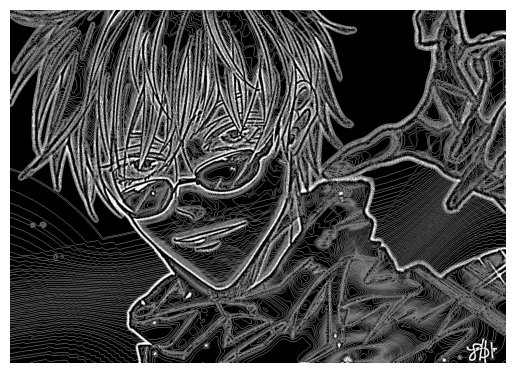

In [32]:
plt.imshow(loG(gojo,3),cmap = 'grey')
plt.axis('off')
plt.show()

<h3>doG</h3>

In [35]:
def doG(image,sigma):
    sigma1 = sigma/np.sqrt(2)
    sigma2 = np.sqrt(2) * sigma
    G1  = cv2.GaussianBlur(image,(13,13),sigma1)
    G2  = cv2.GaussianBlur(image,(13,13),sigma2)
    G = cv2.subtract(G1,G2)
    return G.astype(np.uint8)

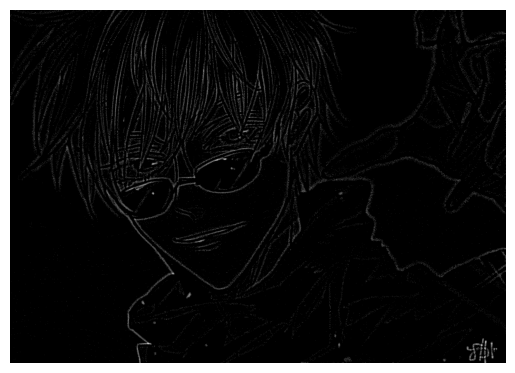

In [40]:
plt.imshow(doG(gojo,15),cmap = 'grey')
plt.axis('off')
plt.show()

<h1>Edge detection</h1>

<h3>Prewitt Kernels</h3>

In [ ]:
def prewitt_filter(img):
    kernelx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernely = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    gx = np.zeros_like(img, dtype=np.int64)
    gy = np.zeros_like(img, dtype=np.int64)
    padded_img = cv2.copyMakeBorder(img,1,1,1,1, cv2.BORDER_REFLECT)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            win = padded_img[i:i+3, j:j+3]
            gx[i, j] = np.sum(win * kernelx)
            gy[i, j] = np.sum(win * kernely)
    result_img = np.hypot(gx, gy)
    result_img = np.clip(result_img, 0, 255)
    return result_img.astype(np.uint8)

In [ ]:
plt.imshow(prewitt_filter(gojo),cmap = 'grey')
plt.axis('off')
plt.show()

<h3>Scharr Kernels</h3>

In [ ]:
def scharr_filter(img):
    kernelx = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
    kernely = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])
    gx = np.zeros_like(img, dtype=np.int64)
    gy = np.zeros_like(img, dtype=np.int64)
    padded_img = cv2.copyMakeBorder(img,1,1,1,1, cv2.BORDER_REFLECT)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            win = padded_img[i:i+3, j:j+3]
            gx[i, j] = np.sum(win * kernelx)
            gy[i, j] = np.sum(win * kernely)
    result_img = np.hypot(gx, gy)
    result_img = np.clip(result_img, 0, 255)
    return result_img.astype(np.uint8)

In [ ]:
plt.imshow(scharr_filter(gojo),cmap = 'grey')
plt.axis('off')
plt.show()